## Google Colab 사용 방법

- 방향키 ↑↓: 셀 간 이동
- Enter: 편집모드
- Ctrl + Enter: 셀 실행
- Shift + Enter: 셀 실행 + 다음 셀 선택

---

- Ctrl +M D: 셀 삭제
- Ctrl + M K: 셀 위로 이동
- Ctrl + M J: 셀 아래로 이동

![alt text](https://hackernoon.com/hn-images/0*Xhz01Vby2rg86xZj)

# 1. Pandas

Pandas는 다음과 같은 특징을 같습니다.
- NumPy를 내부적으로 활용함(NumPy의 특징을 그대로 가짐)
- 데이터분석에 특화된 데이터 구조 제공
- 다양한 데이터 분석 함수 제공
- 데이터베이스에 쉽게 연결 가능

## Cheat Sheet

판다스는 많은 기능을 제공합니다. 이번 강의에서는 이러한 기능들을 학습할 예정입니다.</br>
그러나 이 모든 기능을 외울 순 없습니다. 외울 필요도 없고요.

**아래는 판다스를 한 장에 정리해 둔 치트시트입니다**

어떠한 기능들을 하는 함수들이 있다는것만 학습한 뒤 해당 기능이 필요할 때 아래의 치트시트를 참조해가며 판다스를 사용하면 됩니다.



![](http://drive.google.com/uc?export=view&id=12qAWxrdhFmdYN61uYbqM58jHm1y9PWJ3)

파이썬에서 pandas를 사용할 때는 일반적으로 다음과 같이 pd형태로 임포트해서 사용합니다

In [1]:
import pandas as pd

In [2]:
# numpy와 matplotlib 임포트
# %matplotlib inline # 노트북에서 그래프를 보여주기 위해 추가해주는 코드
import numpy as np
import matplotlib.pyplot as plt

Pandas의 모든 API는 help 함수를 이용하여 도움말을 확인할 수 있습니다.

In [ ]:
# help(pd)
# help(pd.read_csv)
help(pd.DataFrame)
# pd.DataFrame?

# 2. Pandas 데이터 구조

![](http://drive.google.com/uc?export=view&id=1B0ZpHC2hCXfoeYKxMT4DRHqKrQbEbztj)

## Series
- 1차원 데이터 구조
- 일반적으로 s 또는 sr로 이름 붙임

![](http://drive.google.com/uc?export=view&id=1msqZqjnrFLJXlaBGF7DsLf2B0_lA_J07)

Series는 **pd.Series()** 로 생성합니다.

In [112]:
s = pd.Series([3, -5, 7, 4]) # 인덱스 없이 생성

In [113]:
s

0    3
1   -5
2    7
3    4
dtype: int64

인덱스를 특별히 지정해주지 않으면 NumPy 다차원배열처럼 0부터 인덱스가 시작됩니다.

NumPy 다차원 배열과 다르게 Pandas Series는 인덱스를 지정해 줄 수 있으며 숫자가 아닌 문자열도 인덱스가 될 수 있습니다.

In [117]:
s = pd.Series([3, -5, 7, 4], index=['a', 'b', 'c', 'd'])

In [118]:
s

a    3
b   -5
c    7
d    4
dtype: int64

**type()**을 통해 데이터타입이 Series인 걸 확인할 수 있습니다.

In [8]:
type(s)

pandas.core.series.Series

### 속성

Series는 index와 values를 가집니다.

In [9]:
s.index

Index(['a', 'b', 'c', 'd'], dtype='object')

In [10]:
s.values

array([ 3, -5,  7,  4], dtype=int64)

### 인덱싱

Series는 요소는 index명 또는 index의 순서를 통해 인덱싱할 수 있습니다.

In [ ]:
# index명으로 조회
s['a']

In [ ]:
# index순서로 조회
s[0]

### 파이썬 딕셔너리와 Pandas Series의 공통점, 차이점

Index와 value를 가진다는 점에서 key와 value를 가지는 파이썬 딕셔너리와 유사하다 볼 수 있습니다.

그렇기에 파이썬 딕셔너리를 통해 Series를 생성할 수 있습니다.

In [3]:
# pop_dict는 파이썬 딕셔너리
pop_dict = {'Germany': 81.3, 
            'Belgium': 11.3, 
            'France': 64.3, 
            'United Kingdom': 64.9, 
            'Netherlands': 16.9}

# pop_dict로 Series 생성
population = pd.Series(pop_dict)
population

Germany           81.3
Belgium           11.3
France            64.3
United Kingdom    64.9
Netherlands       16.9
dtype: float64

딕셔너리에서 key값을 이용해 value를 조회하듯 Series에서 index를 이용해 value를 조회할 수 있습니다.

In [12]:
pop_dict['France']

64.3

In [13]:
population['France']

64.3

딕셔너리와 Series의 차이점은, 딕셔너리의 Key는 순서가 없고 pandas Series의 index는 순서가 있다는 점입니다.
그렇기에 Series는 index의 순서를 통해서도 value 조회가 가능합니다.

In [14]:
# KeyError 발생(2라는 Key 값은 없음)
pop_dict[2]

KeyError: 2

In [15]:
population[2]

64.3

또한 Series는 딕셔너리와 다르게 아래와 같은 연산이 가능합니다.

In [16]:
population*1000

Germany           81300.0
Belgium           11300.0
France            64300.0
United Kingdom    64900.0
Netherlands       16900.0
dtype: float64

In [17]:
# TypeError발생 (dict * int)
pop_dict * 1000

TypeError: unsupported operand type(s) for *: 'dict' and 'int'

## 참고. Index가 문자열에 저장된 숫자일 경우

Series의 요소를 조회하는데 혼돈이 올 수 있으니 숫자 Index를 원할 경우,
- 문자가 아닌 정수형으로 index를 지정합시다.
- 1이 아닌 0부터 index를 지정합시다.

In [18]:
sr = pd.Series([1, 2, 3, 4], index=['1', '2', '3', '4'])

In [19]:
# index명으로 접근
sr['1']

1

In [20]:
# index순서로 접근
sr[1]

2

DataFrame에서도 마찬가지로 숫자 Index를 사용할 경우 염두해두어야 합니다.

## DataFrame
- 2차원 데이터 구조
- 일반적으로 df로 이름 붙임
- 엑셀 스프레드시트, 데이터베이스등과 동일한 2차원 구조
- 가장 많이 활용하게될 구조
- Series가 합쳐진 형태

![](http://drive.google.com/uc?export=view&id=1lixriaQy119N0nNM0e_TTQ1DfuSNMk76)

DataFrame은 **pd.DataFrame()** 으로 생성합니다.

중첩된 리스트나 딕셔너리를 통해 DataFrame을 생성할 수 있습니다.

In [4]:
# 중첩된 리스트를 통한 데이터 생성
# 각 행을 리스트로 만들어야 함
data = [['Belgium', 'Brussels', 11190846],
        ['India', 'New Delhi', 1303171035],
        ['Brazil', 'Brasília', 207847528]]

df = pd.DataFrame(data)

df

,0,1,2
0,Belgium,Brussels,11190846
1,India,New Delhi,1303171035
2,Brazil,Brasília,207847528


columns 파라메터를 통해 칼럼명 역시 정해줄 수 있습니다.

In [5]:
# 중첩된 리스트를 통한 데이터 생성
# 각 행을 리스트로 만들어야 함
data = [['Belgium', 'Brussels', 11190846],
        ['India', 'New Delhi', 1303171035],
        ['Brazil', 'Brasília', 207847528]]

df = pd.DataFrame(data, columns=['Country', 'Capital', 'Population'])

df

,Country,Capital,Population
0,Belgium,Brussels,11190846
1,India,New Delhi,1303171035
2,Brazil,Brasília,207847528


데이터프레임의 데이터는 딕셔너리로 넘겨주는게 일반적입니다.

- 칼럼명을 함께 넘겨줄 수 있기 때문입니다.
- **동일한 데이터타입끼리 함께 묶어서 넘겨줄 수 있기 때문입니다.**

In [6]:
data = {'Country': ['Belgium', 'India', 'Brazil'],
        'Capital': ['Brussels', 'New Delhi', 'Brasília'],
        'Population': [11190846, 1303171035, 207847528]}

df = pd.DataFrame(data)

df

,Country,Capital,Population
0,Belgium,Brussels,11190846
1,India,New Delhi,1303171035
2,Brazil,Brasília,207847528


칼럼명과 마찬가지로 인덱스 역시 변경할 수 있습니다.

In [29]:
data = {'Country': ['Belgium', 'India', 'Brazil'],
        'Capital': ['Brussels', 'New Delhi', 'Brasília'],
        'Population': [11190846, 1303171035, 207847528]}

df_2 = pd.DataFrame(data,
                    index=['aa', 'bb', 'cc'])

df_2

,Country,Capital,Population
aa,Belgium,Brussels,11190846
bb,India,New Delhi,1303171035
cc,Brazil,Brasília,207847528


**type()**을 통해 데이터타입이 DataFrame인 걸 확인할 수 있습니다.

In [23]:
type(df)

pandas.core.frame.DataFrame

데이터프레임의 하나의 열은 어떤 데이터구조로 되어있을까요?

In [25]:
type(df['Country'])

pandas.core.series.Series

In [33]:
df.Country

0    Belgium
1      India
2     Brazil
Name: Country, dtype: object

데이터프레임 각 열의 데이터타입은 Series라는걸 알 수 있습니다.

### 속성

아래와 같은 속성을 가집니다.

- index
- columns
- dtypes
- values

In [36]:
df.index

RangeIndex(start=0, stop=3, step=1)

In [37]:
df_2.index

Index(['aa', 'bb', 'cc'], dtype='object')

In [35]:
df.columns

Index(['Country', 'Capital', 'Population'], dtype='object')

In [38]:
df.dtypes

Country       object
Capital       object
Population     int64
dtype: object

In [39]:
df.values

array([['Belgium', 'Brussels', 11190846],
       ['India', 'New Delhi', 1303171035],
       ['Brazil', 'Brasília', 207847528]], dtype=object)

Index, columns, dtypes를 한번에 조회하고 싶다면 info()를 사용하세요.

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Country     3 non-null      object
 1   Capital     3 non-null      object
 2   Population  3 non-null      int64 
dtypes: int64(1), object(2)
memory usage: 200.0+ bytes


특정한 칼럼을 index로 사용할수도 있습니다.

In [19]:
df

,Country,Capital,Population
0,Belgium,Brussels,11190846
1,India,New Delhi,1303171035
2,Brazil,Brasília,207847528


In [42]:
df_index_with_country = df.set_index('Country')

df_index_with_country

,Capital,Population
Country,,
Belgium,Brussels,11190846
India,New Delhi,1303171035
Brazil,Brasília,207847528


하나의 인덱스만 가능한것은 아닙니다. DataFrame은 여러개의 인덱스를 가질 수 있습니다.

In [43]:
df_index_with_country_and_capital = df.set_index(['Country', 'Capital'])

df_index_with_country_and_capital

,,Population
Country,Capital,
Belgium,Brussels,11190846
India,New Delhi,1303171035
Brazil,Brasília,207847528


In [44]:
# 인덱싱
df_index_with_country_and_capital.loc[['Belgium', 'Brusseles']]

,,Population
Country,Capital,
Belgium,Brussels,11190846


### Dataframe의 column은 어떤 데이터타입일까

기존에 학습한 데이터프레임 생성 방식은 아래처럼 모든 데이터를 직접 명시해주는 것이었습니다.

아래 코드는 각 열을 파이썬의 리스트 형태로 입력하는 방식입니다.
리스트 형태로 입력된 데이터를 기반으로 판다스가 Series를 만들고 Series들로 DataFrame을 만드는 것이죠.

In [46]:
data = {'col1': [1, 2, 3, 4],
        'col2': [5, 6, 7, 8],
        'col3': [9, 10, 11, 12]}

df_3 = pd.DataFrame(data, 
                    index=['A', 'B', 'C', 'D'])

df_3

,col1,col2,col3
A,1,5,9
B,2,6,10
C,3,7,11
D,4,8,12




![](http://drive.google.com/uc?export=view&id=1vXLOGcypyLgT12DGNIGTnmna8BIW1pvK)




파이썬 리스트가 아닌 Series를 통해서도 DataFrame을 생성할 수 있습니다.

In [45]:
s_1 = pd.Series([1, 2, 3, 4], index=['A', 'B', 'C', 'D'])
s_2 = pd.Series([5, 6, 7, 8], index=['A', 'B', 'C', 'D'])
s_3 = pd.Series([9, 10, 11, 12], index=['A', 'B', 'C', 'D'])

data = {'col1': s_1,
        'col2': s_2,
        'col3': s_3}

df_4 = pd.DataFrame(data, index=['A', 'B', 'C', 'D'])

df_4

,col1,col2,col3
A,1,5,9
B,2,6,10
C,3,7,11
D,4,8,12


## NumPy ndarray와 비교

### 공통점

NumPy 다차원배열처럼 많은 연산들이 요소들간에 이루어집니다.(Elementwise-operation)

In [47]:
s

a    3
b   -5
c    7
d    4
dtype: int64

In [48]:
s + 10

a    13
b     5
c    17
d    14
dtype: int64

In [49]:
df

,Country,Capital,Population
0,Belgium,Brussels,11190846
1,India,New Delhi,1303171035
2,Brazil,Brasília,207847528


In [50]:
df['Population'] / 1000

0      11190.846
1    1303171.035
2     207847.528
Name: Population, dtype: float64

In [52]:
df['Country'] + df['Capital']

0    BelgiumBrussels
1     IndiaNew Delhi
2     BrazilBrasília
dtype: object

### 차이점

Series간 연산을 하는 경우, index를 기반으로 이루어집니다. 

(모든 NumPy 다차원배열은 shape가 동일하다면 index도 동일하기에 index가 달라 연산이 이루어지지 않는 경우는 없음.)

In [53]:
s

a    3
b   -5
c    7
d    4
dtype: int64

In [57]:
s1 = s[['a', 'b']]
s2 = s[['b', 'c']]

In [55]:
s1

a    3
b   -5
dtype: int64

In [56]:
s2

b   -5
c    7
dtype: int64

In [58]:
s1 + s2

a     NaN
b   -10.0
c     NaN
dtype: float64

## 실습

In [59]:
df_index_with_country

,Capital,Population
Country,,
Belgium,Brussels,11190846
India,New Delhi,1303171035
Brazil,Brasília,207847528


<div class="alert alert-success">
    <b>EXERCISE</b>: df_index_with_country이 데이터로 주어졌을때 각 국가의 수도 인구는 벨기에 수도 인구 대비 몇 배인지 구하세요.
</div>

In [62]:
df_index_with_country['Population'] / df_index_with_country['Population']['Belgium']

Country
Belgium      1.000000
India      116.449734
Brazil      18.572995
Name: Population, dtype: float64

# 3. Pandas Importing/Exproting

직접 데이터를 입력하여 DataFrame이나 Series를 생성할 일은 실무에서 많지 않습니다.<br>
실무에서는 이미 데이터가 존재하는 경우가 많고 그 데이터를 판다스로 importing해서 분석을 진행합니다.

CSV나 엑셀 형태의 파일로 저장된 데이터를 판다스로 가져오거나 직접 데이터베이스에 연결해서 데이터를 가져와서 작업하는 경우가 일반적입니다.

pandas가 지원하는 Importing/Exporting 포맷은 아래와 같습니다.
- csv (모든 text파일 연결에 사용)
- excel
- sql (모든 데이터베이스 연결에 사용)
- hdf5
- json
- html
- pickle
- ...

Importing 함수의 경우 **pd.read** 형태를 가지며 Exporting 함수의 경우 **df.to** 형태를 가집니다.


예시) json의 경우

In [63]:
json_data = df.to_json()
json_data

'{"Country":{"0":"Belgium","1":"India","2":"Brazil"},"Capital":{"0":"Brussels","1":"New Delhi","2":"Bras\\u00edlia"},"Population":{"0":11190846,"1":1303171035,"2":207847528}}'

In [64]:
pd.read_json(json_data)

,Country,Capital,Population
0,Belgium,Brussels,11190846
1,India,New Delhi,1303171035
2,Brazil,Brasília,207847528


## 1) CSV

하나의 파일로 관리 가능한 크기의 데이터라면, 데이터를 파일로 저장할때 일반적으로 CSV포맷을 활용합니다.

CSV는 comma-separated values의 약자이며 값들을 ,로 구분합니다.

### Importing

In [3]:
# 파일다운로드 받기
!wget -O 'iris_sample.csv' https://raw.githubusercontent.com/duc-ke/edu_jupyter_pandas/master/dataset/iris_sample.csv

'wget'은(는) 내부 또는 외부 명령, 실행할 수 있는 프로그램, 또는
배치 파일이 아닙니다.


In [4]:
df_iris_sample = pd.read_csv('iris_sample.csv')

In [5]:
df_iris_sample

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa
6,4.6,3.4,1.4,0.3,setosa
7,5.0,3.4,1.5,0.2,setosa
8,4.4,2.9,1.4,0.2,setosa
9,4.9,3.1,1.5,0.1,setosa


csv뿐만 아니라 tsv, txt도 read_csv()파일을 통해 읽어올 수 있습니다.

파일 관점에서 보면 csv, tsv, txt는 동일합니다. csv, tsv역시 txt파일이며 값을 구분하는 구분자가 콤마냐 탭이냐의 차이입니다.

#### txt

In [73]:
# 'iris_sample.txt' 로 확장자를 바꿔 파일다운로드 받기
!wget -O 'iris_sample.txt' https://raw.githubusercontent.com/duc-ke/edu_jupyter_pandas/master/dataset/iris_sample.csv

'wget'은(는) 내부 또는 외부 명령, 실행할 수 있는 프로그램, 또는
배치 파일이 아닙니다.


In [6]:
pd.read_csv('iris_sample.txt')

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa
6,4.6,3.4,1.4,0.3,setosa
7,5.0,3.4,1.5,0.2,setosa
8,4.4,2.9,1.4,0.2,setosa
9,4.9,3.1,1.5,0.1,setosa


#### tsv

TSV는 tab-separated values의 약자이며 값들을 tab으로 구분합니다.

In [ ]:
!wget -O 'tsv_sample.tsv' https://gist.githubusercontent.com/mbostock/3305937/raw/a5be7c5fd55c4fa0ca8a400cb68d658a40989966/data.tsv

In [ ]:
pd.read_csv('tsv_sample.tsv')

In [ ]:
pd.read_csv('tsv_sample.tsv', sep='\t')

### Exporting
csv를 통해 생성한 df_iris_sample에서 첫 5행만 'iris_sample_2.csv'로 저장해봅시다

In [7]:
df_iris_sample.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [9]:
df_iris_sample_2 = df_iris_sample.head()

In [10]:
df_iris_sample_2

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [11]:
df_iris_sample_2.to_csv('iris_sample_2.csv')

잘 저장되었는지 다시 확인해보겠습니다.

In [12]:
pd.read_csv('iris_sample_2.csv')

,Unnamed: 0,sepal_length,sepal_width,petal_length,petal_width,species
0,0,5.1,3.5,1.4,0.2,setosa
1,1,4.9,3.0,1.4,0.2,setosa
2,2,4.7,3.2,1.3,0.2,setosa
3,3,4.6,3.1,1.5,0.2,setosa
4,4,5.0,3.6,1.4,0.2,setosa


**Unnamed: 0** 라는 열이 들어가 있습니다. 이는 to_csv()시 index도 함께 파일에 저장되기에 생기는 문제입니다.

저장시 index=False 를 통해 이 문제를 해결할 수 있습니다.

In [13]:
df_iris_sample_2.to_csv('iris_sample_2_no_index.csv', index=False)

In [14]:
pd.read_csv('iris_sample_2_no_index.csv')

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


txt, tsv도 동일한 to_csv()로 다룰 수 있습니다.

## 2) 엑셀

엑셀파일은 read_excel(), to_excel() 을 활용해서 다룹니다.

### 입력

In [ ]:
# 파일다운로드 받기
!wget -O '성적표.xlsx' https://www.dropbox.com/s/zubhmxf4aj9eg7y/%EC%84%B1%EC%A0%81%ED%91%9C.xlsx?dl=0

In [ ]:
pd.read_excel('성적표.xlsx')

기본적으로 read_excel()은 첫번째 시트를 가져옵니다. 위 코드는 sheet_name=0이 생략되어있으며 아래의 코드와 동일한 결과를 보입니다. 

In [ ]:
pd.read_excel('성적표.xlsx', sheet_name=0)

두 번째 시트를 가져오려면 sheet_name 파라메터에 1을 전달해야 합니다.

In [ ]:
pd.read_excel('성적표.xlsx', sheet_name=1)

또는 시트의 이름을 명시해서 가져올수도 있습니다.

In [ ]:
pd.read_excel('성적표.xlsx', sheet_name='Sheet2')

### 출력

to_excel()로 엑셀 파일 쓰기가 가능합니다.

sheet_name 파라메터를 통해 시트명을 정할 수 있습니다.

> to_excel()을 사용하기 위해선 ‘openpyxl’ 또는 ‘xlsxwriter’ 라이브러리가 필요합니다.

In [ ]:
# xlsxwriter 라이브러리 설치
!pip install xlsxwriter

In [ ]:
df_sheet2 = pd.read_excel('성적표.xlsx', sheet_name='Sheet2')

df_sheet2.to_excel('to_excel.xlsx', sheet_name='이름을 적어주세요')
# df_sheet2.to_excel('to_excel.xlsx', sheet_name='이름을 적어주세요', index=False)

In [ ]:
pd.read_excel('to_excel.xlsx')

## 3) 데이터베이스

In [ ]:
#  라이브러리 설치
!pip install mysql-connector-python

In [ ]:
import sqlalchemy

user = "anonymous"
host = "ensembldb.ensembl.org"
port = 3337
database = "ailuropoda_melanoleuca_core_79_1"

url = f"mysql+mysqlconnector://{user}@{host}:{port}/{database}"
# url = f"mysql+mysqlconnector://{user}:{password}@{host}:{port}/{database}"

connection = sqlalchemy.create_engine(url)

In [ ]:
pd.read_sql("select * from analysis limit 10", connection)

# 4. 인덱싱/슬라이싱


## 0) [ ] 

- **[ ]** 연산자를 활용해 데이터를 가져올 수 있습니다.
- 간단히 사용하기에는 좋지만 불규칙적이라 loc, iloc를 통한 인덱싱/슬라이싱을 추천합니다.

In [20]:
df

,Country,Capital,Population
0,Belgium,Brussels,11190846
1,India,New Delhi,1303171035
2,Brazil,Brasília,207847528


- 단일 칼럼 조회

In [21]:
df['Country']

0    Belgium
1      India
2     Brazil
Name: Country, dtype: object

- 복수 칼럼 조회

In [22]:
df[['Country', 'Population']]

,Country,Population
0,Belgium,11190846
1,India,1303171035
2,Brazil,207847528


- 슬라이싱
  - **[ ]** 를 통한 슬라이싱은 row(행)에 적용됩니다.

In [23]:
# index 슬라이싱. 2 미포함
df[0:2]

,Country,Capital,Population
0,Belgium,Brussels,11190846
1,India,New Delhi,1303171035


- 슬라이싱
  - index로 슬라이싱 하지 않고 label로 슬라이싱 하는 경우, 마지막 라벨은 포함됩니다.

In [26]:
data = {'Country': ['Belgium', 'India', 'Brazil'],
        'Capital': ['Brussels', 'New Delhi', 'Brasília'],
        'Population': [11190846, 1303171035, 207847528]}

df_2 = pd.DataFrame(data
                  , index=['aa', 'bb', 'cc']                  
                 )

df_2

,Country,Capital,Population
aa,Belgium,Brussels,11190846
bb,India,New Delhi,1303171035
cc,Brazil,Brasília,207847528


In [38]:
# label 슬라이싱. 'cc' 포함
df_2['aa':'cc']

,Country,Capital,Population
aa,Belgium,Brussels,11190846
bb,India,New Delhi,1303171035
cc,Brazil,Brasília,207847528


## 1) 인덱싱

- loc (Label based indexing)
- iloc (Positional indexing)
- ix (사용 권장하지 않음)

In [39]:
df.iloc[0,0] # 위치를 통한 인덱싱

'Belgium'

In [40]:
df.iat[0,0] # 위치를 통한 인덱싱

'Belgium'

In [41]:
df.loc[0, 'Country'] # 라벨을 통한 인덱싱

'Belgium'

In [ ]:
df.at[0, 'Country'] # 라벨을 통한 인덱싱

In [ ]:
df.ix[1, 'Capital'] # 위치/라벨을 통한 인덱싱 (사용하지 말것을 권장)
                    # 행은 위치, 열은 라벨을 통해 인덱싱

## 2) 슬라이싱

In [45]:
df.iloc[0:1,0:2] # 위치를 통한 슬라이싱 (끝은 미포함)

,Country,Capital
0,Belgium,Brussels


In [43]:
df.loc[0:1, 'Country':'Capital'] # 라벨을 통한 슬라이싱 (끝 포함)

,Country,Capital
0,Belgium,Brussels
1,India,New Delhi


## 3) 불리언 인덱싱 (필터링)
- 조건을 제시하고 조건이 True인 요소만을 조회하는 방식
- 필터링이라고도 불리웁니다.

In [46]:
df

,Country,Capital,Population
0,Belgium,Brussels,11190846
1,India,New Delhi,1303171035
2,Brazil,Brasília,207847528


In [47]:
df['Population'] > 200000000

0    False
1     True
2     True
Name: Population, dtype: bool

In [48]:
df[df['Population'] > 200000000] 

,Country,Capital,Population
1,India,New Delhi,1303171035
2,Brazil,Brasília,207847528


## 실습

In [53]:
# dataframe
data = {'country': ['Belgium', 'France', 'Germany', 'Netherlands', 'United Kingdom'],
        'population': [11.3, 64.3, 81.3, 16.9, 64.9],
        'area': [30510, 671308, 357050, 41526, 244820],
        'capital': ['Brussels', 'Paris', 'Berlin', 'Amsterdam', 'London']}
countries = pd.DataFrame(data)
countries = countries.set_index('country') # 인덱스 지정
countries

,population,area,capital
country,,,
Belgium,11.3,30510,Brussels
France,64.3,671308,Paris
Germany,81.3,357050,Berlin
Netherlands,16.9,41526,Amsterdam
United Kingdom,64.9,244820,London


---

<div class="alert alert-success">
    <b>EXERCISE</b>: 인구밀도를 의미하는 `density` 칼럼을 추가하세요. (주의: 현재 'population' 칼럼은 10만 단위로 표기되어 있습니다)  
  
</div>

In [55]:
countries['density'] = countries['population']*1000000 / countries['area']
countries

,population,area,capital,density
country,,,,
Belgium,11.3,30510,Brussels,370.370370
France,64.3,671308,Paris,95.783158
Germany,81.3,357050,Berlin,227.699202
Netherlands,16.9,41526,Amsterdam,406.973944
United Kingdom,64.9,244820,London,265.092721


<div class="alert alert-success">
    <b>EXERCISE</b>: 인구밀도가 300을 초과하는 국가(country)의 수도(capital)과 인구(population)을 선택해주세요.  
  
</div>

In [66]:
countries.loc[countries['density'] > 300, ['population','capital']]

,population,capital
country,,
Belgium,11.3,Brussels
Netherlands,16.9,Amsterdam


<div class="alert alert-success">
    <b>EXERCISE</b>: 'density_ratio' 칼럼을 추가해주세요. (density_ratio = 인구밀도/평균 인구밀도)
</div>

In [75]:
countries['density_ratio'] = countries['population']/countries['population'].mean()
countries

,population,area,capital,density,density_ratio
country,,,,,
Belgium,11.3,30510,Brussels,370.370370,0.236699
France,64.3,671308,Paris,95.783158,1.346879
Germany,81.3,357050,Berlin,227.699202,1.702974
Netherlands,16.9,41526,Amsterdam,406.973944,0.354001
United Kingdom,64.9,244820,London,265.092721,1.359447


<div class="alert alert-success">
    <b>EXERCISE</b>: 영국(United Kingdom)의 수도(capital)를 'Cambridge'로 변경해주세요.
</div>

In [85]:
countries.loc['United Kingdom','capital'] = 'Cambridge'
countries

,population,area,capital,density,density_ratio
country,,,,,
Belgium,11.3,30510,Brussels,370.370370,0.236699
France,64.3,671308,Paris,95.783158,1.346879
Germany,81.3,357050,Berlin,227.699202,1.702974
Netherlands,16.9,41526,Amsterdam,406.973944,0.354001
United Kingdom,64.9,244820,Cambridge,265.092721,1.359447


<div class="alert alert-success">
    <b>EXERCISE</b>: 인구 밀도가 100 초과, 300 미만인 국가들을 표시해주세요.  
</div>

In [101]:
countries.loc[(countries['density'] < 300) & (countries['density'] > 100)]

,population,area,capital,density,density_ratio
country,,,,,
Germany,81.3,357050,Berlin,227.699202,1.702974
United Kingdom,64.9,244820,Cambridge,265.092721,1.359447




---



- 스트링 다루는 법

In [102]:
countries['capital'].str.len()

country
Belgium           8
France            5
Germany           6
Netherlands       9
United Kingdom    9
Name: capital, dtype: int64



---



<div class="alert alert-success">
    <b>EXERCISE</b>: 수도가 7글자 이상인 국가들을 표시해주세요. (힌트: string의 len( )를 사용하세요.)
</div>

In [103]:
countries[countries['capital'].str.len()>6]

,population,area,capital,density,density_ratio
country,,,,,
Belgium,11.3,30510,Brussels,370.370370,0.236699
Netherlands,16.9,41526,Amsterdam,406.973944,0.354001
United Kingdom,64.9,244820,Cambridge,265.092721,1.359447


<div class="alert alert-success">
    <b>EXERCISE</b>: 수도에 'am' 이 포함되는 국가들을 표시해주세요. (힌트: string의 contains( )를 사용하세요.)
</div>

In [104]:
countries[countries['capital'].str.contains('am')]

,population,area,capital,density,density_ratio
country,,,,,
Netherlands,16.9,41526,Amsterdam,406.973944,0.354001
United Kingdom,64.9,244820,Cambridge,265.092721,1.359447


# 5. 삭제

## 1) Row(행) 삭제


- axis=0
- axis의 기본 값이 0이니 생략 가능

### 단일 행 삭제

In [105]:
df.drop(1)

,Country,Capital,Population
0,Belgium,Brussels,11190846
2,Brazil,Brasília,207847528


### 복수 행 삭제

In [108]:
df.drop([0,1])

,Country,Capital,Population
2,Brazil,Brasília,207847528


## 2) Column(열) 삭제

- axis=1

### 단일 열 삭제

In [109]:
df.drop('Country', axis=1)

,Capital,Population
0,Brussels,11190846
1,New Delhi,1303171035
2,Brasília,207847528


### 복수 열 삭제

In [110]:
df.drop(['Country', 'Population'], axis=1)

,Capital
0,Brussels
1,New Delhi
2,Brasília


## 참조. Series 삭제

In [119]:
s

a    3
b   -5
c    7
d    4
dtype: int64

In [120]:
s.drop(['a', 'c'])
# s = s.drop(['a', 'c']) # 삭제한 결과를 사용하고 싶다면 다시 변수로 선언해주어야 한다

b   -5
d    4
dtype: int64

In [122]:
s

a    3
b   -5
c    7
d    4
dtype: int64

# 6. Pandas 함수

In [123]:
df

,Country,Capital,Population
0,Belgium,Brussels,11190846
1,India,New Delhi,1303171035
2,Brazil,Brasília,207847528


##  데이터 탐색에 유용한 함수

In [124]:
df.describe() # 숫자 열에만 적용. 숫자열의 통계값과 최대최소값등을 보여줌

,Population
count,3.000000e+00
mean,5.074031e+08
std,6.961346e+08
min,1.119085e+07
25%,1.095192e+08
50%,2.078475e+08
75%,7.555093e+08
max,1.303171e+09


In [125]:
df.head(2) # 초반 n행을 보여줌. default는 5
# df.head(n=2)

,Country,Capital,Population
0,Belgium,Brussels,11190846
1,India,New Delhi,1303171035


In [126]:
df.sort_values('Population') # 오름차순 정렬

,Country,Capital,Population
0,Belgium,Brussels,11190846
2,Brazil,Brasília,207847528
1,India,New Delhi,1303171035


In [127]:
df.sort_values('Population', ascending=False) # 내림차순 정렬

,Country,Capital,Population
1,India,New Delhi,1303171035
2,Brazil,Brasília,207847528
0,Belgium,Brussels,11190846


In [128]:
df.isnull() # null값이 있는지 확인

,Country,Capital,Population
0,False,False,False
1,False,False,False
2,False,False,False


In [129]:
# column(열)별로 null값이 있는지 확인
df.isnull().any() # axis=0이 생략된 형태
# df.isnull().any(axis=0)

Country       False
Capital       False
Population    False
dtype: bool

In [130]:
# row(행)별로 null값이 있는지 확인
df.isnull().any(axis=1)

0    False
1    False
2    False
dtype: bool

In [131]:
# null값이 DataFrame내에 하나라도 있는지 확인
df.isnull().any().any()

False

In [11]:
df2 = df.copy()

In [12]:
df2

,Country,Capital,Population
0,Belgium,Brussels,11190846
1,India,New Delhi,1303171035
2,Brazil,Brasília,207847528


In [140]:
df2.loc[0, 'Population'] = None

In [141]:
df2

,Country,Capital,Population
0,Belgium,Brussels,NaN
1,India,New Delhi,1.303171e+09
2,Brazil,Brasília,2.078475e+08


In [142]:
df2.isnull().any()

Country       False
Capital       False
Population     True
dtype: bool

## aggregate 함수

In [13]:
df.count()

Country       3
Capital       3
Population    3
dtype: int64

In [146]:
df.sum()

Country              BelgiumIndiaBrazil
Capital       BrusselsNew DelhiBrasília
Population                   1522209409
dtype: object

In [147]:
df.min()

Country        Belgium
Capital       Brasília
Population    11190846
dtype: object

In [148]:
df.max()

Country            India
Capital        New Delhi
Population    1303171035
dtype: object

In [149]:
df.mean() # 숫자 열에만 적용

Population    5.074031e+08
dtype: float64

In [6]:
df.median() # 숫자 열에만 적용

Population    207847528.0
dtype: float64

## 실습

In [151]:
!wget -O 'titles.csv' https://docs.google.com/spreadsheets/d/1fiioUPMRurfE523yWGaRF3ckO-TUHu1AaIAI6Eo7Ti8/export?format=csv

'wget'은(는) 내부 또는 외부 명령, 실행할 수 있는 프로그램, 또는
배치 파일이 아닙니다.


In [7]:
titles = pd.read_csv('titles.csv')
titles.head()

,title,year
0,The Rising Son,1990
1,Ashes of Kukulcan,2016
2,The Thousand Plane Raid,1969
3,Crucea de piatra,1993
4,The 86,2015


<div class="alert alert-success">
    <b>EXERCISE</b>: titles 데이터프레임에는 몇 개의 영화가 기록되어 있나요?
</div>

In [21]:
titles.count()

title    215981
year     215981
dtype: int64

<div class="alert alert-success">
    <b>EXERCISE</b>: titles에서 가장 빠른 시기에 제작된 영화 두 개를 표시하세요.
</div>

In [27]:
titles.sort_values('year').head(2)

,title,year
165182,Miss Jerry,1894
85708,Reproduction of the Corbett and Fitzsimmons Fight,1897


<div class="alert alert-success">
    <b>EXERCISE</b>: 제목(title)이 "Hamlet"인 영화는 몇 개가 있나요?
</div>

In [30]:
titles[titles['title'] == 'Hamlet'].count()

title    19
year     19
dtype: int64

<div class="alert alert-success">
    <b>EXERCISE</b>: 제목(title)이 "Treasure Island"인 영화를 제작년도(year)의 오름차순에 따라 표시하세요. (df.sort_values())
</div>

In [33]:
titles[titles['title'] == 'Treasure Island'].sort_values('year')

,title,year
191379,Treasure Island,1918
47769,Treasure Island,1920
192917,Treasure Island,1934
90175,Treasure Island,1950
104714,Treasure Island,1972
103646,Treasure Island,1973
190792,Treasure Island,1985
166675,Treasure Island,1999


<div class="alert alert-success">
    <b>EXERCISE</b>: 1590년에서 1959년 사이 몇 개의 영화가 만들어졌나요?(1950 <= 제작년도 <= 1959)
</div>

In [35]:
titles[(titles['year'] > 1590) & (titles['year'] < 1959)].count()

title    44102
year     44102
dtype: int64

# 7. apply 함수

- apply함수는 요소별로 적용됨

## 하나의 요소를 활용하는 경우

In [36]:
df.loc[:, 'Population':'Population']

,Population
0,11190846
1,1303171035
2,207847528


- 각 Population에 1씩 추가

In [37]:
df.loc[:, 'Population':'Population'].apply(lambda x: x + 1)

,Population
0,11190847
1,1303171036
2,207847529


## 여러개의 요소를 활용하는 경우

In [38]:
df.loc[:, 'Country':'Capital']

,Country,Capital
0,Belgium,Brussels
1,India,New Delhi
2,Brazil,Brasília


칼럼명(Country, Capital)을 사용해도 되고 칼럼 위치(0, 1)를 사용해도 됩니다.

In [39]:
df.loc[:, 'Country':'Capital'].apply(lambda x: x['Country'] + "'s capital is " + x['Capital'], axis=1)

0    Belgium's capital is Brussels
1     India's capital is New Delhi
2     Brazil's capital is Brasília
dtype: object

In [44]:
df.loc[:, 'Country':'Capital'].apply(lambda x: x[0] + "'s capital is " + x[1], axis=1)

0    Belgium's capital is Brussels
1     India's capital is New Delhi
2     Brazil's capital is Brasília
dtype: object

# 8. GroupBy

dataframe을 key값에 따라 나눈 뒤 각각에 특정한 함수를 적용한 뒤 다시 합치고 싶을때 사용합니다.

groupby는 Split-Apply-Combine 단계를 거칩니다.

- **Split**: Key값에 따라 나눈 뒤
- **Apply**: 함수를 적용
- **Combine**: 다시 합치기


SQL의 **GROUP BY**와 유사합니다.

![alt text](https://github.com/jorisvandenbossche/pandas-tutorial/blob/master/img/splitApplyCombine.png?raw=true)

아래 데이터로 Groupby 예를 들어 보겠습니다.

In [45]:
df = pd.DataFrame({'key':['A','B','C','A','B','C','A','B','C'],
                   'data': [0, 5, 10, 5, 10, 15, 10, 15, 20]})
df

,key,data
0,A,0
1,B,5
2,C,10
3,A,5
4,B,10
5,C,15
6,A,10
7,B,15
8,C,20


key값에 따라 data의 합을 구하고 싶다면 어떻게 해야 할까요?

key값대로 불리언인덱싱을 한 후 sum()함수를 취해주면 됩니다.

In [46]:
df['key'].unique()

array(['A', 'B', 'C'], dtype=object)

key는 'A', 'B', 'C' 이렇게 세 개가 있고 각각의 키값에 대해 불리언 인덱싱을 한 후 sum()해보겠습니다.

In [47]:
df[df['key'] == "A"].sum()

key     AAA
data     15
dtype: object

In [48]:
df[df['key'] == "B"].sum()

key     BBB
data     30
dtype: object

In [49]:
df[df['key'] == "C"].sum()

key     CCC
data     45
dtype: object

이 과정을 groupby를 사용하면 한번에 수행할 수 있습니다.

In [50]:
df.groupby('key').sum()
# df.groupby('key').aggregate(np.sum)  # 'sum'

,data
key,
A,15
B,30
C,45


## 실습

In [51]:
df = pd.read_csv('https://raw.githubusercontent.com/jorisvandenbossche/pandas-tutorial/master/data/titanic.csv')

In [52]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


타이타닉 데이터셋을 df라는 판다스 데이터프레임으로 불러왔습니다. 이 데이터로 아래 실습을 진행해주세요.

<div class="alert alert-success">
    <b>EXERCISE</b>: groupby()를 사용하여 각 성별(sex)의 평균 나이(age)를 구하세요.
</div>

In [79]:
df.groupby('Sex').mean()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
Sex,,,,,,,
female,431.028662,0.742038,2.159236,27.915709,0.694268,0.649682,44.479818
male,454.147314,0.188908,2.389948,30.726645,0.429809,0.235702,25.523893


<div class="alert alert-success">
    <b>EXERCISE</b>: 전체 승객(passenger)의 평균 생존율을 구하세요.
</div>

In [94]:
df['Survived'].sum()/df['PassengerId'].count()

0.3838383838383838

<div class="alert alert-success">
    <b>EXERCISE</b>: 25세 이하 승객의 생존율을 구하세요. (힌트: 불리언 인덱싱)
</div>

In [103]:
df[df['Age']<=25]['Survived'].sum()/df['PassengerId'].count()

0.13916947250280584

<div class="alert alert-success">
    <b>EXERCISE</b>: 남성의 생존율을 구하세요. 여성의 생존율을 구하세요. (힌트: 불리언 인덱싱)
</div>

In [137]:
df.groupby('Sex')['Survived'].sum()/df.groupby('Sex')['Survived'].count()

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64

<div class="alert alert-success">
    <b>EXERCISE</b>: 생존율을 구하는 함수가 작성되어 있습니다. 성별 생존율을 groupby를 활용해 구하기 위해 ?부분을 알맞게 채워주세요.
</div>

In [138]:
def survival_ratio(survived):
    return survived.sum() / len(survived)
  
df.groupby('Sex')['Survived'].aggregate(survival_ratio)  

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64

<div class="alert alert-success">
    <b>EXERCISE</b>: 'Pclass'별로 생존율을 보기 위해 bar 차트를 그리고자 합니다. ?부분을 알맞게 채워서 bar 차트를 그려주세요.
</div>

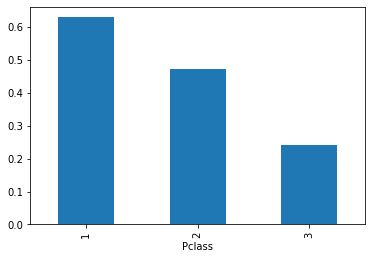

In [139]:
df.groupby('Pclass')['Survived'].aggregate(survival_ratio).plot(kind='bar')